In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load CO₂ Data



In [2]:
file_path = 'co2_bmw_surface-flask_1_ccgg_month.txt'

data = []
header_lines = 70

with open(file_path, "r") as file:
    for line in file:
        if not line.startswith("#"):
            line_data = line.strip().split()
            data.append(line_data)

# Create a Pandas DataFrame
df_co2 = pd.DataFrame(data, columns=["site", "year", "month", "co2_concentration"])

# Convert numeric columns to appropriate data types
df_co2[["year", "month", "co2_concentration"]] = df_co2[["year", "month", "co2_concentration"]].astype(float)

# Process the data as needed
print(df_co2)




    site    year  month  co2_concentration
0    BMW  1989.0    5.0             357.33
1    BMW  1989.0    6.0             354.38
2    BMW  1989.0    7.0             351.02
3    BMW  1989.0    8.0             350.00
4    BMW  1989.0    9.0             351.39
..   ...     ...    ...                ...
384  BMW  2021.0    8.0             412.17
385  BMW  2021.0    9.0             410.46
386  BMW  2021.0   10.0             414.35
387  BMW  2021.0   11.0             417.60
388  BMW  2021.0   12.0             418.11

[389 rows x 4 columns]


### Load CH₄ Data



In [3]:
file_path = "ch4_bmw_surface-flask_1_ccgg_month.txt"
#file_path = "ch4_key_surface-flask_1_ccgg_month.txt"

data = []
header_lines = 70

with open(file_path, "r") as file:
    for line in file:
        if not line.startswith("#"):
            line_data = line.strip().split()
            data.append(line_data)

# Create a Pandas DataFrame
df_ch4 = pd.DataFrame(data, columns=["site", "year", "month", "ch4_concentration"])

# Convert numeric columns to appropriate data types
df_ch4[["year", "month", "ch4_concentration"]] = df_ch4[["year", "month", "ch4_concentration"]].astype(float)

print(df_ch4)





    site    year  month  ch4_concentration
0    BMW  1989.0    5.0            1767.49
1    BMW  1989.0    6.0            1747.81
2    BMW  1989.0    7.0            1732.89
3    BMW  1989.0    8.0            1729.28
4    BMW  1989.0    9.0            1736.27
..   ...     ...    ...                ...
381  BMW  2021.0    8.0            1914.27
382  BMW  2021.0    9.0            1944.50
383  BMW  2021.0   10.0            1972.61
384  BMW  2021.0   11.0            1983.26
385  BMW  2021.0   12.0            1977.50

[386 rows x 4 columns]


### Merge, Clean and Wrangle Data into a Pandas DataFrame

In [4]:
df_merged_ghg = pd.merge(df_co2, df_ch4, on=['site', 'year', 'month'])


df_merged_ghg['year'] = df_merged_ghg['year'].astype(int)
df_merged_ghg['month'] = df_merged_ghg['month'].astype(int)

# Create a new 'time' column combining 'year' and 'month'
df_merged_ghg['time'] = pd.to_datetime(df_merged_ghg[['year', 'month']].assign(day=1))
df_merged_ghg

,site,year,month,co2_concentration,ch4_concentration,time
0,BMW,1989,5,357.33,1767.49,1989-05-01
1,BMW,1989,6,354.38,1747.81,1989-06-01
2,BMW,1989,7,351.02,1732.89,1989-07-01
3,BMW,1989,8,350.00,1729.28,1989-08-01
4,BMW,1989,9,351.39,1736.27,1989-09-01
...,...,...,...,...,...,...
381,BMW,2021,8,412.17,1914.27,2021-08-01
382,BMW,2021,9,410.46,1944.50,2021-09-01
383,BMW,2021,10,414.35,1972.61,2021-10-01
384,BMW,2021,11,417.60,1983.26,2021-11-01


### Preliminary Greenhouse Gas visualization:

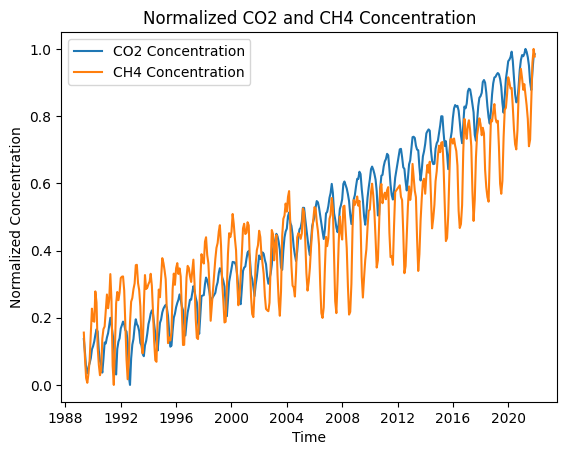

In [5]:
# Define the normalization function
def normalize(data):
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

# Normalize the CO2 and CH4 concentration columns
df_normalized = df_merged_ghg.copy()
df_normalized['co2_normalized'] = normalize(df_normalized['co2_concentration'])
df_normalized['ch4_normalized'] = normalize(df_normalized['ch4_concentration'])

# Plot the normalized data on a time series plot
plt.plot(df_normalized['time'], df_normalized['co2_normalized'], label='CO2 Concentration')
plt.plot(df_normalized['time'], df_normalized['ch4_normalized'], label='CH4 Concentration')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Normalized Concentration')
plt.title('Normalized CO2 and CH4 Concentration')

# Add legend
plt.legend()

# Display the plot
plt.show()


### Manually import and clean Atlantic ACE Data

Data directly from [NOAA](https://ourworldindata.org/grapher/ace-north-atlantic-hurricanes?tab=table).
 Columns: no_storms denoting number of storms that year, and ACE deonting the Accumulated Cyclone Energy of North Atlantic Hurricanes

In [6]:
import pandas as pd

data = """
Year d no_storms d hurr d maj_hurr ACE Rev_ACE d1 us1 d2 us2
1989 11 11 7 7 2 2 135 135 3 (1,4,1) 3 (1,4,1)
1990 14 14 8 8 1 1 97 97 0 0
1991 8 8 4 4 2 2 36 36 1 (2) 1 (2)
1992 7 7 4 4 1 1 73 76 1 (4) 1 (5)
1993 8 8 4 4 1 1 39 39 1 (3) 1 (3)
1994 7 7 3 3 0 0 32 32 0 0
1995 19 19 11 11 5 5 228 228 2 (2,3) 2 (2,3)
1996 13 13 9 9 6 6 166 166 2 (2,3) 2 (2,3)
1997 8 8 3 3 1 1 41 41 1 (1) 1 (1)
1998 14 14 10 10 3 3 182 182 3 (2,1,2) 3 (2,1,2)
1999 12 12 8 8 5 5 177 177 3 (3,2,1) 3 (3,2,1)
2000 15 15 8 8 3 3 119 119 0 0
2001 15 15 9 9 4 4 110 110 0 0
2002 12 12 4 4 2 2 67 67 1 (1) 1 (1)
2003 16 16 7 7 3 3 176 176 2 (1,2) 2 (1,2)
2004 15 15 9 9 6 6 227 227 6 (1,4,1,2,3,3) 6 (1,4,1,2,3,3)
2005 28 28 15 15 7 7 250 250 6 (1,3,3,1,3,3) 6 (1,3,3,1,3,3)
2006 10 10 5 5 2 2 79 79 0 0
2007 15 15 6 6 2 2 74 74 1 (1) 1 (1)
2008 16 16 8 8 5 5 146 146 3 (1,2,2) 3 (1,2,2)
2009 9 9 3 3 2 2 53 53 0 0
2010 19 19 12 12 5 5 165 165 0 0
2011 19 19 7 7 4 4 126 126 1 (1) 1 (1)
2012 19 19 10 10 2 2 129 129 2 (1,1) 2 (1,1)
2013 14 14 2 2 0 0 36 36 0 0
2014 8 8 6 6 2 2 67 67 1 (2) 1 (2)
2015 11 11 4 4 2 2 63 63 0 0
2016 15 15 7 7 4 4 141 141 2 (1,1) 2 (1,1)
2017 17 17 10 10 6 6 223 223 3 (4,1,1) 3 (4,1,1)
2018 15 15 8 8 2 2 132 132 2 (1,5) 2 (1,5)
2019 18 18 6 6 3 3 132 132 2 (1,2) 2 (1,2)
2020 30 30 14 14 7 7 180 180 6 (1,1,4,2,2,3) 6 (1,1,4,2,2,3)
2021 21 21 7 7 4 4 144 144 2 (4,1) 2 (4,1)
"""
#df_ghg.drop(['month', 'time'], axis=1, inplace=True)


# Wrangle into Data Frame
data = [line.strip() for line in data.split('\n') if line.strip()]
df_hurr = pd.DataFrame([line.split() for line in data])
df_hurr.columns = df_hurr.iloc[0]
df_hurr = df_hurr[1:]
df_hurr.drop(['d', 'hurr', 'maj_hurr', 'Rev_ACE', 'd1', 'us1', 'd2', 'us2'], axis=1, inplace=True)

df_hurr['Year'] = pd.to_numeric(df_hurr['Year'])
df_hurr['ACE'] = pd.to_numeric(df_hurr['ACE'])


df_hurr.head()

,Year,no_storms,ACE
1,1989,11,135
2,1990,14,97
3,1991,8,36
4,1992,7,73
5,1993,8,39


### Prelimnary North Atlantic Hurricane Data Visualizations

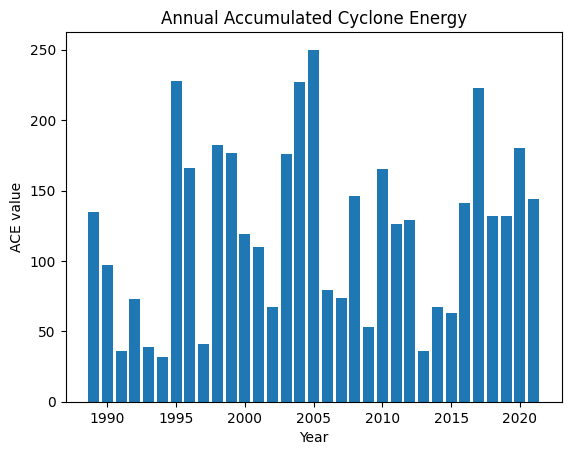

In [7]:
plt.bar(df_hurr['Year'], df_hurr['ACE'])


# Set labels and title
plt.xlabel('Year')
plt.ylabel('ACE value')
plt.title('Annual Accumulated Cyclone Energy')

# Show the plot
plt.show()

### Create Mean Annual GHG Columns and Drop Unnecessary Columns

In [8]:
df_ghg_avg = df_merged_ghg.copy()
df_ghg_avg['year'] = pd.to_numeric(df_ghg_avg['year'], errors='coerce')
df_ghg_avg.drop(['month', 'time', 'site'], axis=1, inplace=True)
df_ghg_avg = df_ghg_avg.groupby('year').mean().reset_index()
df_ghg_avg.head()

,year,co2_concentration,ch4_concentration
0,1989,353.076250,1751.415000
1,1990,355.394167,1766.985833
2,1991,357.002500,1781.962500
3,1992,356.625000,1782.364167
4,1993,357.724167,1795.706667


In [9]:
df_ace = df_hurr
df_ace['year'] = pd.to_numeric(df_ace['Year'], errors='coerce')
df_ace.head()

,Year,no_storms,ACE,year
1,1989,11,135,1989
2,1990,14,97,1990
3,1991,8,36,1991
4,1992,7,73,1992
5,1993,8,39,1993


### Create the Final Visualization:

In [10]:
#CO2_ticks = np.array([350, 360, 370, 380, 390, 400, 410])

ax_1_ticks = np.array([350, 360, 370, 380, 390, 400, 410]) 
ax_1_ticks_labels = np.array([0, 50, 100, 150, 200, 250, 300]) 

ax_3_ticks = np.array([0, 50, 100, 150, 200, 250, 300]) 
ax_3_ticks_labels = np.array([350, 360, 370, 380, 390, 400, 410]) 



#index = np.where(CO2_ticks == 360)[0]
#print(ACE_ticks[index])

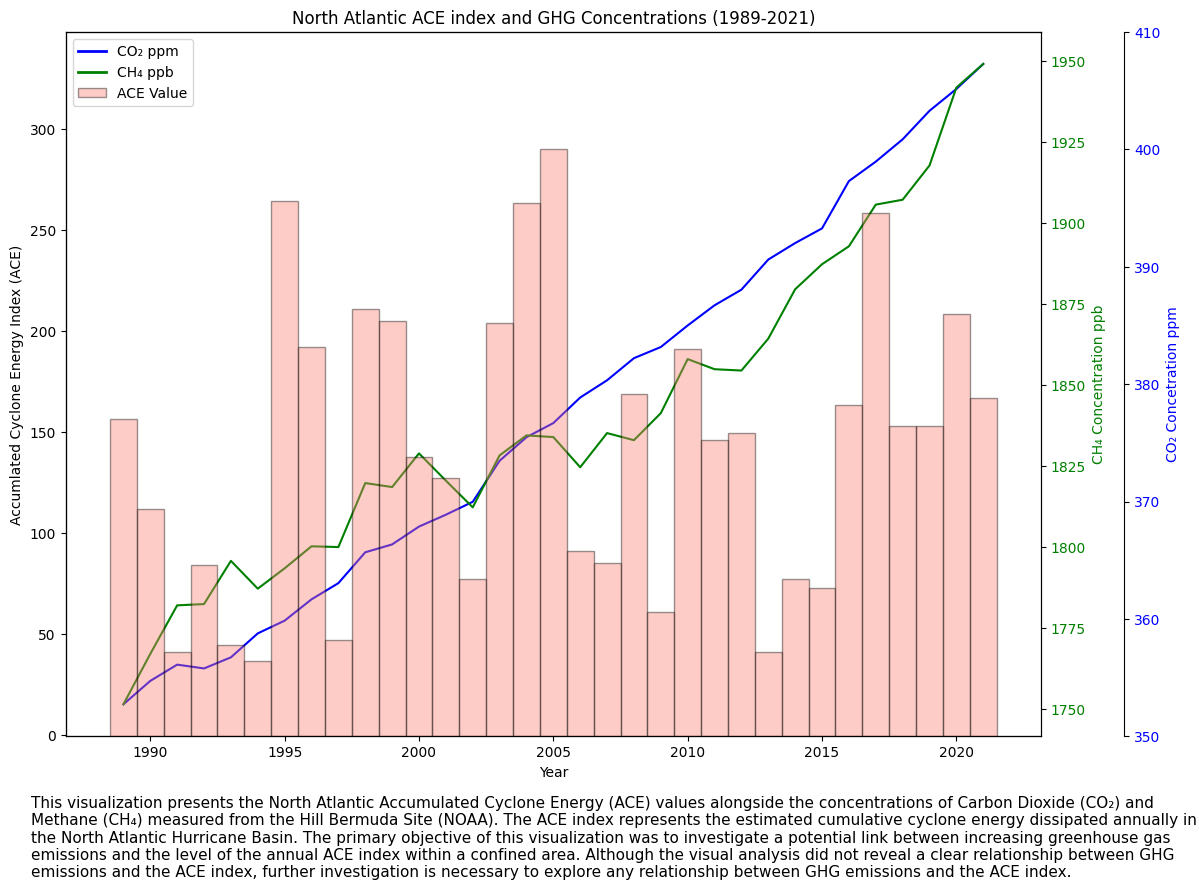

In [37]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# CO2 concentration:
ax1.plot(df_ghg_avg['year'], df_ghg_avg['co2_concentration'], color='blue', label='ACE')
ax1.set_ylabel('Accumlated Cyclone Energy Index (ACE)', color='black')
ax1_yticks = ax_1_ticks
ax1.set_yticks(ax1_yticks)
ax1.set_yticklabels(ax_1_ticks_labels)
ax1.tick_params(axis='y', colors='black')



# CH4 concentration:
ax2 = ax1.twinx()
ax2.plot(df_ghg_avg['year'], df_ghg_avg['ch4_concentration'], color='green', label='CH₄ Concentration ppb')
ax2.set_ylabel('CH₄ Concentration ppb', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# ACE Values:
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.bar(df_ace['Year'], df_ace['ACE'], alpha=0.4, color='salmon', edgecolor='black', width=1.0, label='CO₂ Concetration ppm')
ax3.set_ylabel('CO₂ Concetration ppm', color='blue')
ax3_yticks = ax_3_ticks
ax3.set_yticks(ax3_yticks)
ax3.set_yticklabels(ax_3_ticks_labels)
ax3.tick_params(axis='y', labelcolor='blue')

# Set labels and title
ax1.set_xlabel('Year')
ax1.set_title('North Atlantic ACE index and GHG Concentrations (1989-2021)')

# Manually set the legend
legend_handles = [plt.Line2D([0], [0], color='blue', lw=2),
                  plt.Line2D([0], [0], color='green', lw=2),
                  plt.Rectangle((0, 0), 1, 1, fc='salmon', edgecolor='black', alpha=0.4)]
legend_labels = ['CO₂ ppm', 'CH₄ ppb', 'ACE Value']

ax1.legend(legend_handles, legend_labels, loc='upper left')


# Show the plot
txt = 'This visualization presents the North Atlantic Accumulated Cyclone Energy (ACE) values alongside the concentrations of Carbon Dioxide (CO₂) and Methane (CH₄) measured from the Hill Bermuda Site (NOAA). The ACE index represents the estimated cumulative cyclone energy dissipated annually in the North Atlantic Hurricane Basin. The primary objective of this visualization was to investigate a potential link between increasing greenhouse gas emissions and the level of the annual ACE index within a confined area. Although the visual analysis did not reveal a clear relationship between GHG emissions and the ACE index, further investigation is necessary to explore any relationship between GHG emissions and the ACE index.'

plt.figtext(0.03, -0.1, txt, wrap=True, horizontalalignment='left', fontsize=11)


fig = plt.gcf()
fig.set_size_inches(12, 8)  # Set the figure size (width, height) in inches
plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()

fig.savefig('ACE_GHG_Plot.pdf', bbox_inches='tight')
